## Importing required modules

In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


from datetime import datetime

In [2]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows',500)
sns.set(style="darkgrid")

## Data Collection and Preparation

In [3]:
#data from "Data on COVID-19 (coronavirus) by Our World in Data" (https://github.com/owid/covid-19-data/tree/master/public/data/)
data_path="https://covid.ourworldindata.org/data/owid-covid-data.csv"
pd_raw = pd.read_csv(data_path)

In [4]:
pd_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
#Checking Date and Time format
data=pd_raw.iloc[:,2:4] 
data.head()

,location,date
0,Afghanistan,2020-02-24
1,Afghanistan,2020-02-25
2,Afghanistan,2020-02-26
3,Afghanistan,2020-02-27
4,Afghanistan,2020-02-28


In [6]:
#Extracting required data from the dataset. 

#population
data=data.assign(population=pd_raw.iloc[:,48])

#Total Cases
data=data.assign(total_cases=pd_raw.iloc[:,4])

#Vaccination rate
data=data.assign(vaccination_rate=pd_raw.iloc[:,42])
data.head()

,location,date,population,total_cases,vaccination_rate
0,Afghanistan,2020-02-24,39835428.0,5.0,NaN
1,Afghanistan,2020-02-25,39835428.0,5.0,NaN
2,Afghanistan,2020-02-26,39835428.0,5.0,NaN
3,Afghanistan,2020-02-27,39835428.0,5.0,NaN
4,Afghanistan,2020-02-28,39835428.0,5.0,NaN


## Relative Cases

In [7]:
relative_cases=data.total_cases/data.population

In [8]:
#Assigning Relative cases to the data file

data=data.assign(relative_cases=relative_cases)
data.head()

,location,date,population,total_cases,vaccination_rate,relative_cases
0,Afghanistan,2020-02-24,39835428.0,5.0,NaN,1.255164e-07
1,Afghanistan,2020-02-25,39835428.0,5.0,NaN,1.255164e-07
2,Afghanistan,2020-02-26,39835428.0,5.0,NaN,1.255164e-07
3,Afghanistan,2020-02-27,39835428.0,5.0,NaN,1.255164e-07
4,Afghanistan,2020-02-28,39835428.0,5.0,NaN,1.255164e-07


In [9]:
#Extracting data for plotting the relative cases for 

plot_ralativecases=data.pivot(index='date', columns='location', values='relative_cases')
plot_ralativecases=plot_ralativecases.reset_index().rename_axis(None, axis=1) #remove location index
plot_ralativecases=plot_ralativecases.filter(items=['date','India','Germany','Canada'], axis=1) #Filter only three country
plot_ralativecases.to_csv('../data/processed/relative_cases.csv',index=False) #Creating .csv file of countries
plot_ralativecases

,date,India,Germany,Canada
0,2020-01-01,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN
...,...,...,...,...
907,2022-06-26,0.031152,0.331010,0.103530
908,2022-06-27,0.031160,0.332707,0.103553
909,2022-06-28,0.031171,0.334303,0.103644
910,2022-06-29,0.031184,0.335884,0.103712


## Figure 1 The relative cases overtime of Covid infectors (absolut Covid cases/population size)

<Figure size 1152x648 with 0 Axes>

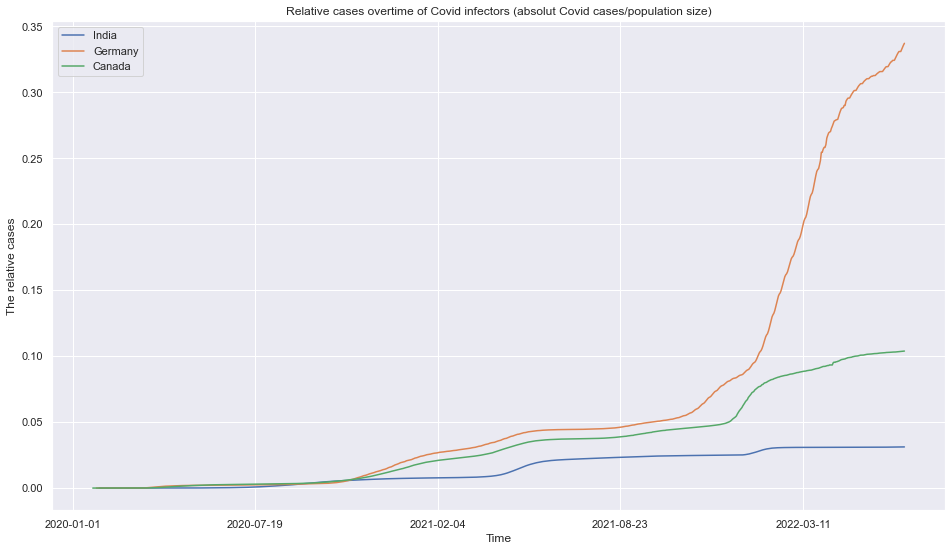

In [10]:
plt.figure();
ax=plot_ralativecases.set_index('date').plot()

plt.xlabel("Time")
plt.ylabel("The relative cases")
plt.title("Relative cases overtime of Covid infectors (absolut Covid cases/population size)")


figure1 = ax.get_figure()
figure1.savefig('../reports/figures/Figure1_RelativeCases_overTime.png')

## The Vaccination rate

In [11]:
#Extracting data for vaccination rate

plot_vaccination_rate=data.pivot(index='date', columns='location', values='vaccination_rate')

plot_vaccination_rate=plot_vaccination_rate.reset_index().rename_axis(None, axis=1) #remove location index
plot_vaccination_rate=plot_vaccination_rate.filter(items=['date','India','Germany','Canada'], axis=1) #Filter only three country
plot_vaccination_rate.to_csv('../data/processed/vaccination_rate.csv',index=False) 
plot_vaccination_rate

,date,India,Germany,Canada
0,2020-01-01,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN
...,...,...,...,...
907,2022-06-26,65.41,75.49,82.60
908,2022-06-27,65.43,75.49,82.60
909,2022-06-28,65.51,75.50,82.60
910,2022-06-29,65.57,75.50,82.60


## Figure 2 The vaccination rate (percentage of the population) over time

<Figure size 1152x648 with 0 Axes>

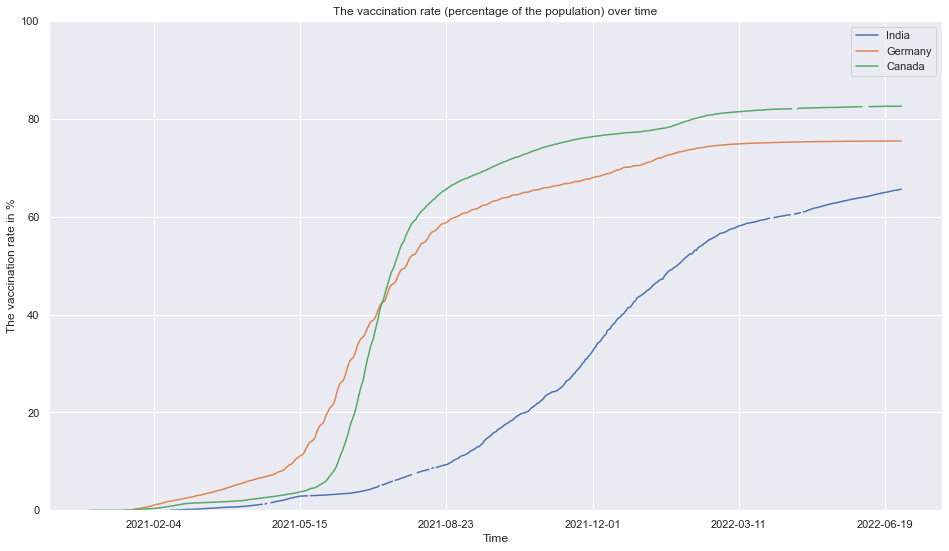

In [12]:
plt.figure();
bx=plot_vaccination_rate.set_index('date').plot()

plt.xlabel("Time")
plt.ylabel("The vaccination rate in %")
plt.ylim(0,100)
plt.title("The vaccination rate (percentage of the population) over time")


figure2 = bx.get_figure()
figure2.savefig('../reports/figures/Figure2_VaccinationRate_overTime.png')